# Chapter 14 Working with vectors and matrices¶
Julia as a Second Language, Erik Engheim

Topics

1. Working with numbers in matrices and performing calculations
2. Slicing and dicing arrays
3. Concatenating arrays along different dimensionsto form larger arrays
 
References Julia 1.9.0 Manual
1. Chapter 19 Single- and multi-dimensional Arrays
2. Chapter 46 Arrays

## Vectors and matrices in mathematics

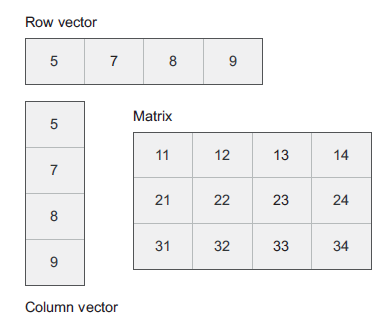

In [ ]:
# Row vector
row = [5 7 8 9]

In [ ]:
# column vector
col = [5, 7, 8, 9]

In [ ]:
# matrix
m = [11 12 13 14; 21 22 23 24; 31 32 33 34]

In [ ]:
# define a matrix row by row
table = [2 6 12; 3 4 12; 6 2 12; 12 1 12]

In [ ]:
# define amatrix row by row
table = [[2 6 12]
[3 4 12]
[6 2 12]
[12 1 12]]

In [ ]:
# define a matrix column by column
x1 = [2, 3, 6, 12]
x2 = [6, 4, 2, 1]
x3 = [12, 12, 12, 12]
table = [x1 x2 x3]

In [ ]:
# define a matrix column by column
table = [[2, 3, 6, 12] [6, 4, 2, 1] [12, 12, 12, 12]]

In [ ]:
typeof(table)

In [ ]:
eltype(table)

In [ ]:
size(table)

In [ ]:
ndims(table)

In [ ]:
length(table)

## The size, length, and norm of an array

If you come from other programming languages it can be easy to confuse these array concepts:
* size—The dimensions of an array
* length—Total number of elements in array
* norm—Magnitude of a vector

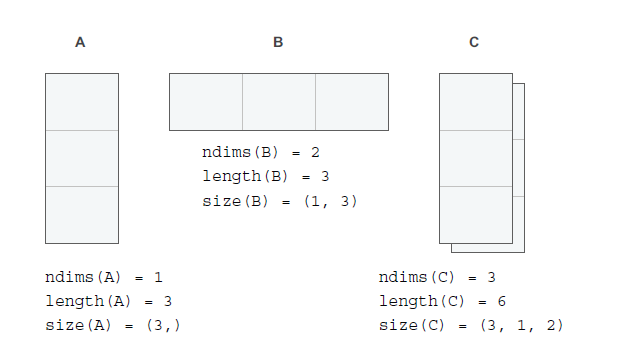

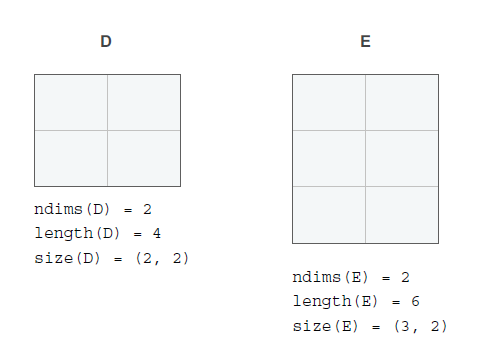

In [ ]:
using LinearAlgebra

In [ ]:
norm([3, 4]), norm([3,4,5])

## Slicing and dicing an array

Julia has great support for selecting slices of arrays of different dimensions. This flexibility comes from the fact that the `setindex!` and `getindex` functions are invoked when you use square brackets [] to access elements or assign to them. 

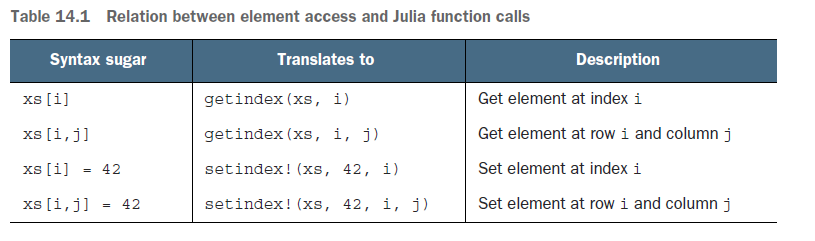

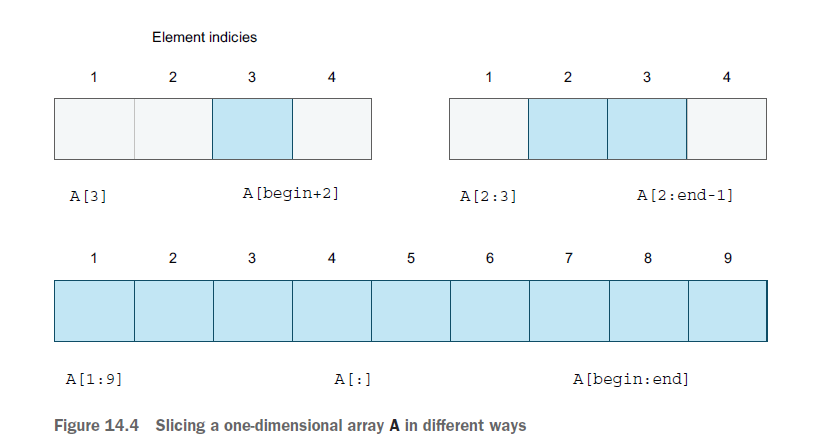

In [ ]:
A = collect('A':'F')

In [ ]:
A[begin+1]

In [ ]:
A[end-1]

In [ ]:
A[2:5]

In [ ]:
A[begin+1:end-1]

In [ ]:
A = [8, 1, 2, 7]

### Differnces between array asignment and slicing

What is the difference between the following two statements:

1. `B = A`, and

2. `B = A[:]`

In [ ]:
B = A[:];

In [ ]:
B[2] = 42

In [ ]:
B

In [ ]:
A

Do you see how the second element of B got changed but not the second element of A? Had you written `B = A` instead of `B = A[:]`, the second element would have been changed in A as well, since A and B would have referred to exactly the same array object.

But what if you want to select a slice of an array without making a copy? Especially when working with very large amounts of data, it can kill performance to frequently copy thousands of elements in some tight inner loop. In these cases, you can create what is called a **view** in a subsection of the array. The slices are not copies of elements of an array but are those elements themselves. You can turn a slice into a view by using the `@view` macro:

In [ ]:
B = @view A[3:end]

In [ ]:
B[2] = 1331

In [ ]:
A

The last result shows that changing the second element of `B` caused the fourth element of `A` to be changed.

## `reshape` function

It gets more interesting when you are dealing with slices for multidimensional arrays, such as matrices.

Let’s create a 2D matrix A to experiment on, using Julia’s `reshape` function.
`reshape` takes an AbstractArray as input. 

Consider the next code example:


In [ ]:
A = reshape(1:12, 3, 4)

The range 1:12 is used as input. All ranges are subtypes of AbstractArray, hence Julia sees the range as a one-dimensional array with 12 elements. The reshape function rearrange these 12 elements to a matrix with 3 rows and 4 columns, referred to as a 3×4 matrix.

**Note**: Elements of a matrix are stored cloumn by column (i.e., column major)

In [ ]:
B = reshape(A, 2, 6)

## Combining matrices and vectors

Data does not always come in the shape and form you’d like for performing matrix operations. You may have n vectors, but really have wanted a matrix with n columns instead. Fortunately, Julia has a number of functions for concatenating matrices. This first example shows how to concatenate two row vectors, either horizontally using hcat or vertically using vcat (figure 14.7).

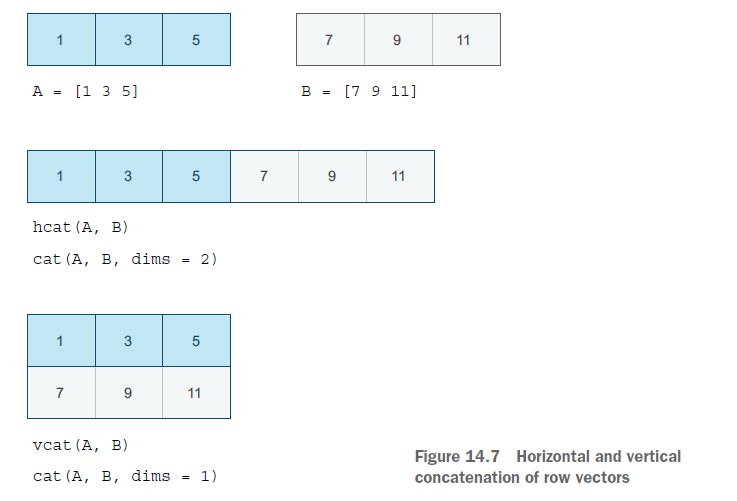


The `cat` function allows you to specify along which dimension you are concatenating. This is useful if you are dealing with higher-dimension arrays. You can perform similar operations with column vectors (figure 14.8).
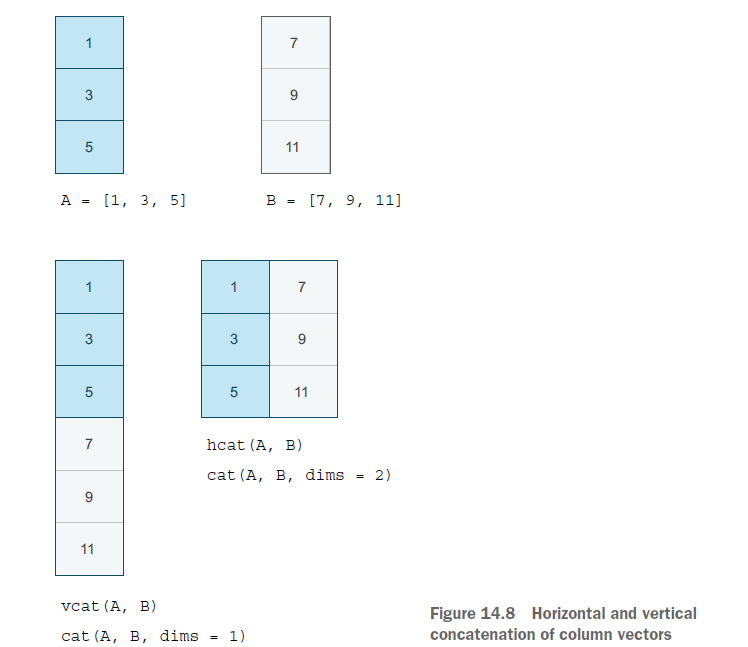



In [ ]:
?cat

The same principles apply to combining matrices; you can concatenate along any
dimension. Horizontal and vertical concatenation have their own functions, `hcat` and `vcat`, because they are done so frequently (figure 14.9).

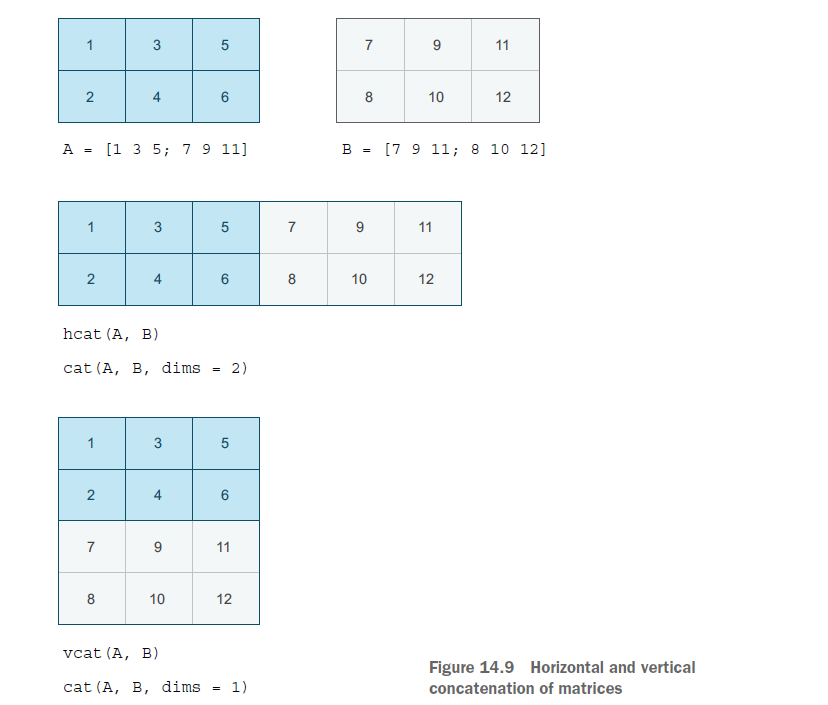

These concatenation functions can take any number of argument; you are not limited to two:

In [ ]:
x = [1, 2, 3]

In [ ]:
y = [8, 6, 4]

In [ ]:
hcat(x, y, x, y)

In [ ]:
hcat(x, 2y, 2x, 3y)

## Broadcasting

**source** https://julia.quantecon.org/getting_started_julia/julia_essentials.html 3.6. Broadcasting

A common scenario in computing is that

- we have a function f such that f(x) returns a number for any number x
- we wish to apply f to every element of an iterable x_vec to produce a new resulty_vec

In Julia loops are fast and we can do this easily enough with a loop.
For  example, suppose that we want to apply sin to x_vec = [2.0, 4.0, 6.0, 8.0].
The following code will do the job

In [ ]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for (i, x) in enumerate(x_vec)
    y_vec[i] = sin(x)
end

But this is a bit unwieldy so Julia offers the alternative syntax

In [ ]:
y_vec = sin.(x_vec)

More generally, if f is any Julia function, then f. references the broadcasted version. Conveniently, this applies to user-defined functions as well.

To illustrate, we will write a function chisq such that chisq(k) returns a chi-squared random variable with k degrees of freedom when k is an integer.
In doing this we’ll exploit the fact that, if we take k independent standard normals, square them all and sum, we get a chi-squared with k degrees of freedom.

In the following function, the macro `@assert` will check that the next expression evaluates to true, and will stop and display an error otherwise.

In [ ]:
function chisq(k)
    @assert k > 0
    z = randn(k)
    return sum(z -> z^2, z) # same as `sum(x^2 for x in z)`
end

In [ ]:
chisq(3)

In [ ]:
chisq(-2)

In [ ]:
chisq.([2, 4, 6])

The broadcasting notation is not simply vectorization, as it is able to “fuse” multiple broadcasts together to generate efficient code.

In [ ]:
x = 1.0:1.0:5.0
y = [2.0, 4.0, 5.0, 6.0, 8.0]
z = similar(y)
z .= x .+ y .- sin.(x) # generates efficient code instead of many temporaries

A convenience macro for adding broadcasting on every function call is `@.`

In [ ]:
@. z = x + y - sin(x)

Another example of using `@` function

In [ ]:
 f(x) = 3x^2 + 5x + 2 

In [ ]:
X = [1.0, 2.0, 3.0]
Y = similar(X)

In [ ]:
Y .= f.(2 .* X.^2 .+ 6 .* X.^3 .- sqrt.(X))

In [ ]:
@. Y = f(2X^2 + 6X^3 - sqrt(X))

The compiler will fix anything which is a scalar, and otherwise iterate across every vector

In [ ]:
f(x, y) = x + y # bivariate function
a = [1 2 3];
b = [4 5 6]

In [ ]:
f.(a, b)

In [ ]:
f.(a, 2)

The compiler is only able to detect “scalar” values in this way for a limited number of types (e.g. integers, floating points, etc) and some packages (e.g. Distributions).

For other types, you will need to wrap any scalars in Ref to fix them, or else it will try to broadcast the value.

Another place that you may use a Ref is to fix a function parameter you do not want to broadcast over.

In [ ]:
using LinearAlgebra  # required the ⋅ (enter \cdot<tab>) i.e. dot() function

In [ ]:
f(x, y) = [1, 2, 3] ⋅ x + y # '⋅' can be typed by \cdot<tab>

In [ ]:
f([3, 4, 5], 2) # uses vector as first parameter

In [ ]:
f.(Ref([3, 4, 5]), [2, 3]) # broadcasting over 2nd parameter, fixing first

### Array Broadcasting

More generally, it allows operations between arrays of different shapes, such as adding avector to every column in a matrix, as follows:
  

In [ ]:
a = collect(1:4) # A column vector of 4 numbers
b = reshape(1:8, 4, 2) # A 4 by2 matrix of 8 numbers
b .+ a

In [ ]:
c = [1 2 3 4] # A row vercor or 4 by 1 matrix
b .+ c # doesn't work

### Punctuation used in Julia (Julia 1.9.0 manual Chapter 52)

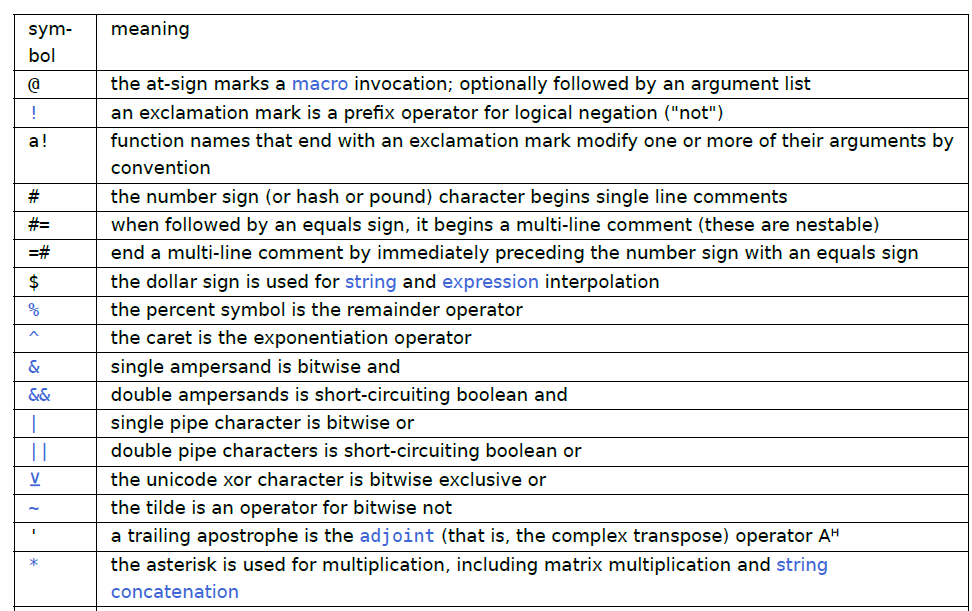

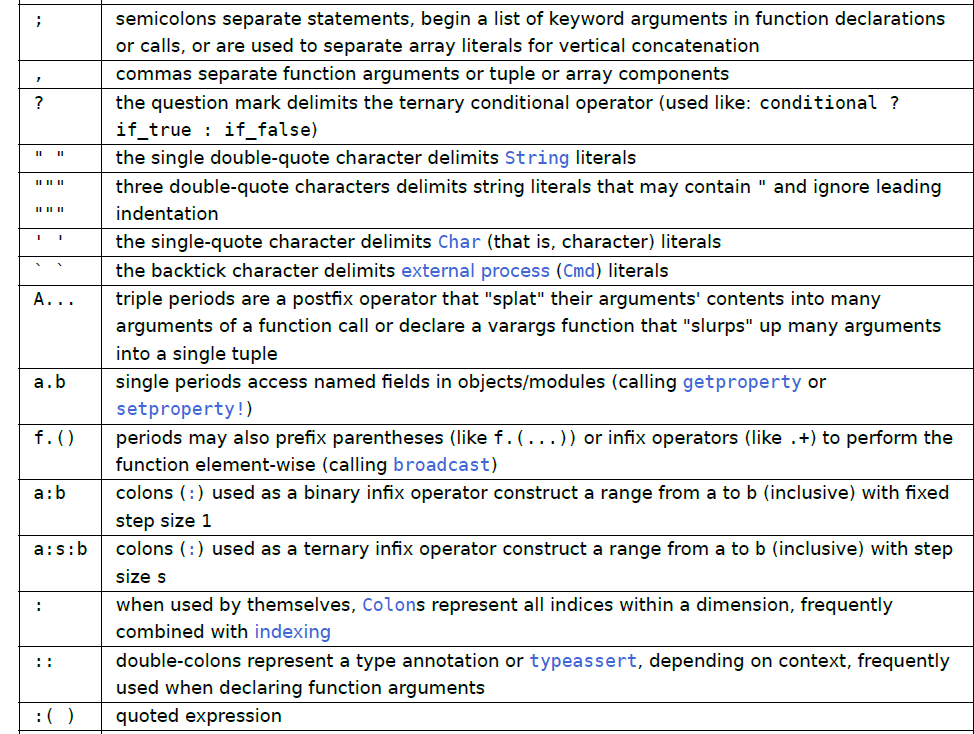


### Variable argument Functions and Splat operator `...`



In [ ]:
?max

In [ ]:
max(1,2,3,4,8, 9, 7)

In [ ]:
max([1,2,3,4,8, 9, 7]) # doesn't work

In [ ]:
max([1,2,3,4,8, 9, 7]...) # work

### Functions with variable number of arguments - Example

In [ ]:
function fvar(args...)
    println("you supplied $(length(args)) arguments")
    for arg in args
       println(" argument ", arg)
    end
end

In [ ]:
fvar()

In [ ]:
fvar(64,65,66)

In [ ]:
fvar([1,2, 3.0, '4', true, 3 < 2]...)

## Creating matrices

When working with matrices, you often need special kinds of matrices.

Some functions used to create matrices (or Arrays of any dimensions) include:

- `zeros`
- `ones`
- `fill`
- `rand`
- `randn`

In [ ]:
zeros(Int8, 2, 3)

In [ ]:
ones(2, 3)

In [ ]:
rand(UInt8, 2, 2)

In [ ]:
a = rand(1:10, 5, 3)

In [ ]:
b = convert(Matrix{Int32}, a)

In [ ]:
x = randn(4, 3)

In [ ]:
y = randn(Float32, 4, 3)

In [ ]:
a = fill(2, 3, 4)

In [ ]:
b = fill(2, 3, 2, 2)

In [ ]:
v1 =[1,2,3,4,5]; v2=[1,1,1,1,1]

In [ ]:
max(abs.(v1-v2)...)